<a href="https://colab.research.google.com/github/pragatheesha/house_price_prediction/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Implement Simple Linear Regression From Scratch
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Load Dataset

df = pd.read_csv('/content/house_prices.csv')
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000
...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Suburb,Villa,17625000
296,PROP0297,3866,1,2,16,City Center,Apartment,41060000
297,PROP0298,1970,3,1,6,Rural,Apartment,13050000
298,PROP0299,4243,3,2,7,Rural,Villa,24865000


In [19]:
# Use ONE feature (Area) for scratch model

X = df["Area"].values
y = df["Price"].values

In [20]:
# Linear Regression from scratch
# Mean values
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate slope (m) and intercept (b)
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)

m = numerator / denominator
b = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (b):", b)


Slope (m): 7771.692409121677
Intercept (b): 3436118.7918802425


In [21]:
# Make predictions (scratch)

y_pred_scratch = m * X + b

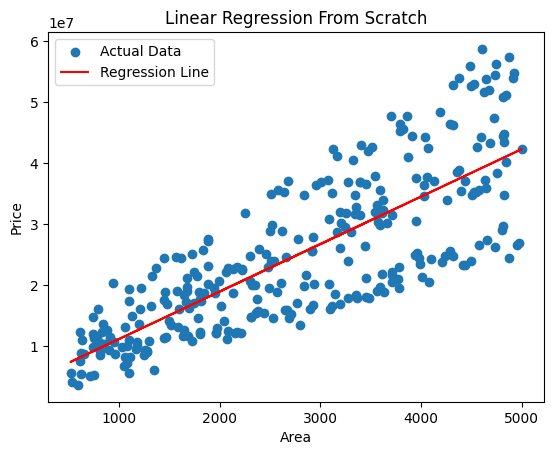

In [22]:
import matplotlib.pyplot as plt
# Visualize scratch regression

plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred_scratch, color="red", label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression From Scratch")
plt.legend()
plt.show()

In [23]:
# Use Scikit-Learn for ML Model
# Prepare data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
X = df[["Area"]]
y = df["Price"]

In [25]:
# Split Data into Training & Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make Predictions

y_pred = model.predict(X_test)

In [28]:
# Evaluate Model Performance (Basic Metrics)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MODEL PERFORMANCE")
print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R2 Score: {r2:.2f}")

MODEL PERFORMANCE
MAE: 6,008,382
RMSE: 7,560,549
R2 Score: 0.60


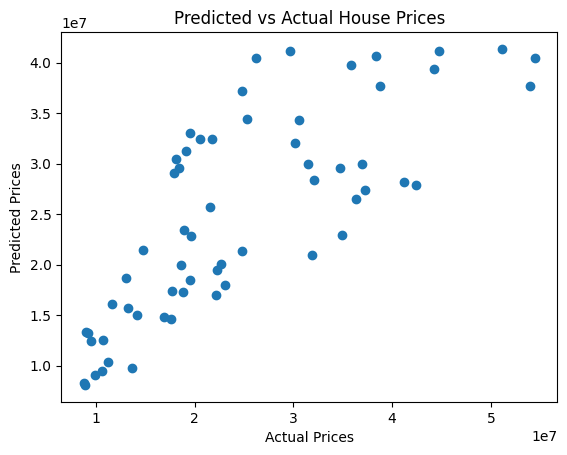

In [29]:
# Visualize Predictions vs Actual Results

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

In [30]:
#Practice with Simple Prediction Problem
# Predict price for a new house

new_house_area = np.array([[2000]])
predicted_price = model.predict(new_house_area)

print(f"Predicted Price for 2000 sq.ft house: {predicted_price[0]:,.0f}")

Predicted Price for 2000 sq.ft house: 18,940,643


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
